In [1]:
###load data
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)#the most frequent 10000 words

Using TensorFlow backend.


17465344/17464789 [==============================] - 335s 19us/step


In [3]:
#map words into int index
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [16]:
###preprocess
import numpy as np


def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.  #set index of result[i] =1
    return results

#vectorize data
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

#vectoriza labels
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

#split validation data
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [17]:
###model with validation set
from keras import models,layers,optimizers,losses,metrics

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

###compile
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

###train
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
history_dict=history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 311us/step - loss: 0.4788 - acc: 0.8000 - val_loss: 0.3527 - val_acc: 0.8766
Epoch 2/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2793 - acc: 0.9067 - val_loss: 0.2985 - val_acc: 0.8836
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2064 - acc: 0.9308 - val_loss: 0.2957 - val_acc: 0.8811
Epoch 4/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1623 - acc: 0.9480 - val_loss: 0.2768 - val_acc: 0.8900
Epoch 5/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1319 - acc: 0.9568 - val_loss: 0.3379 - val_acc: 0.8674
Epoch 6/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1070 - acc: 0.9675 - val_loss: 0.2987 - val_acc: 0.8870
Epoch 7/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.0889 - acc: 0.9737 - val_loss: 0.3210 - 

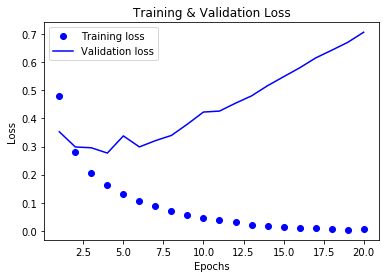

In [21]:
#viasualize losses
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

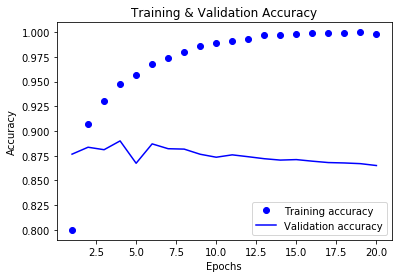

In [22]:
#plt.clf() #clear plots

#viasualize accuracy
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
###model with test set
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

###compile
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

###train
history=model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.4502 - acc: 0.8200
Epoch 2/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2558 - acc: 0.9112
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.1983 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


[0.3112279647874832, 0.87768]

In [25]:
###predict with model
model.predict(x_test)

array([[0.27217615],
       [0.9994024 ],
       [0.9110651 ],
       ...,
       [0.16129053],
       [0.07229932],
       [0.7583062 ]], dtype=float32)